In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

In [2]:
RANDOM_STATE = 42

# Ajustes estéticos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
path = '/datasets/gym_churn_us.csv'
df = pd.read_csv(path)
print('Dimensiones del dataset:', df.shape)


# Mostrar primeras filas
display(df.head())

Dimensiones del dataset: (4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
# Chequeo rápido de tipos y valores faltantes
print('\nTipos de dato:')
print(df.dtypes)


print('\nValores faltantes por columna:')
print(df.isnull().sum())

display(df.describe().T)


Tipos de dato:
gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                float64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object

Valores faltantes por columna:
gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [5]:
print(df['Churn'].value_counts(dropna=False))
print('\nProporción:')
print(df['Churn'].value_counts(normalize=True))

0    2939
1    1061
Name: Churn, dtype: int64

Proporción:
0    0.73475
1    0.26525
Name: Churn, dtype: float64


In [6]:
# 2) ANÁLISIS COMPARATIVO: medias por Churn

In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Columnas numéricas:', numeric_cols)

df.groupby('Churn')[numeric_cols].mean().T

Columnas numéricas: ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']


Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


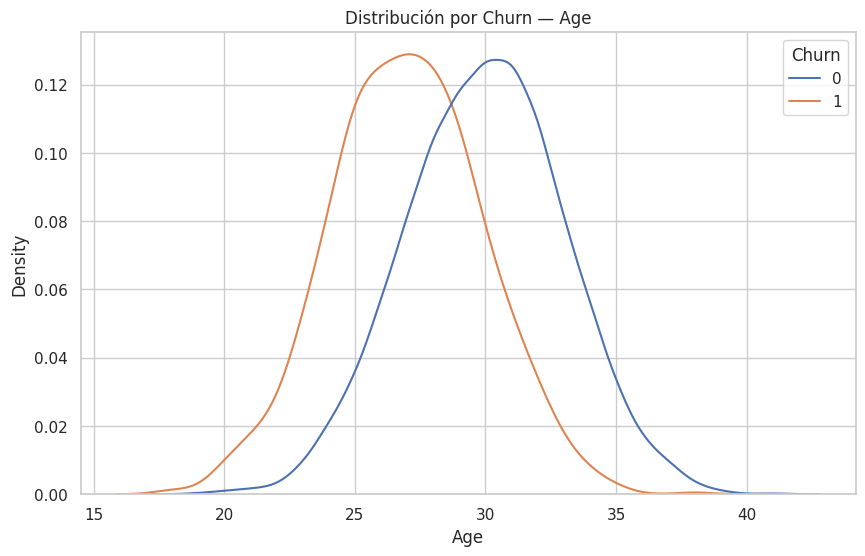

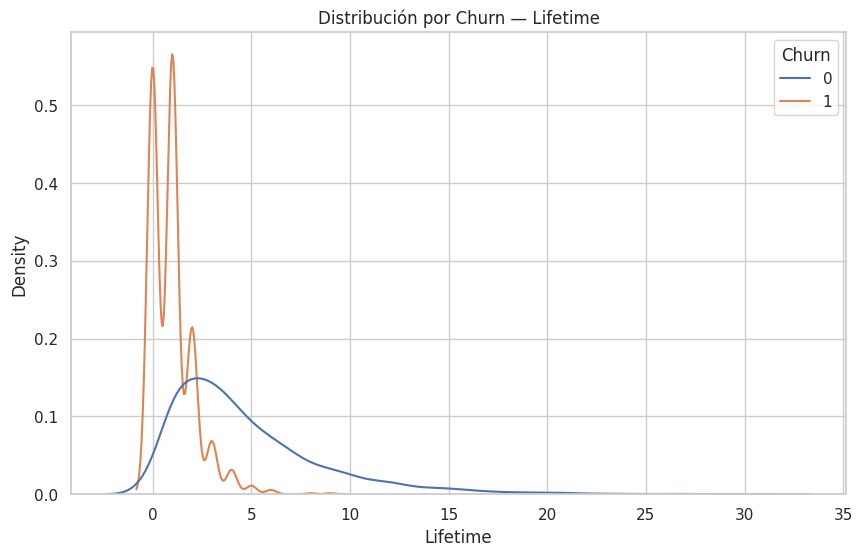

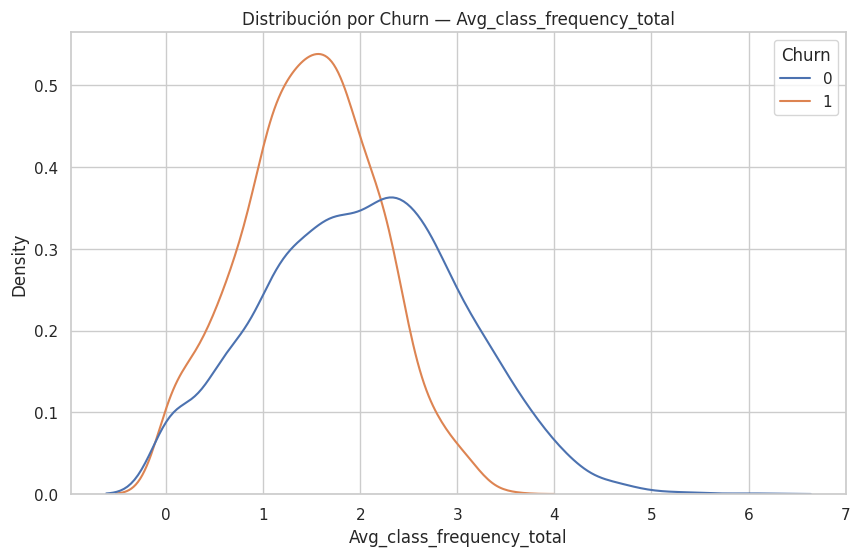

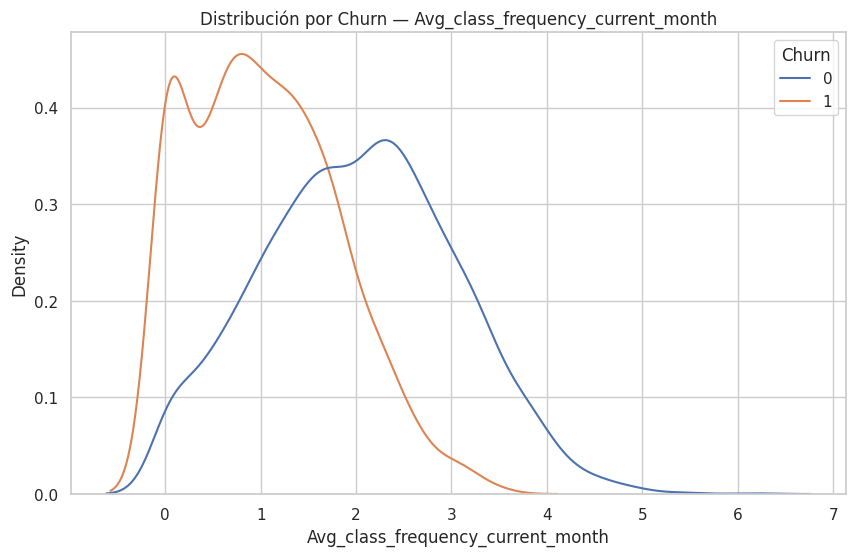

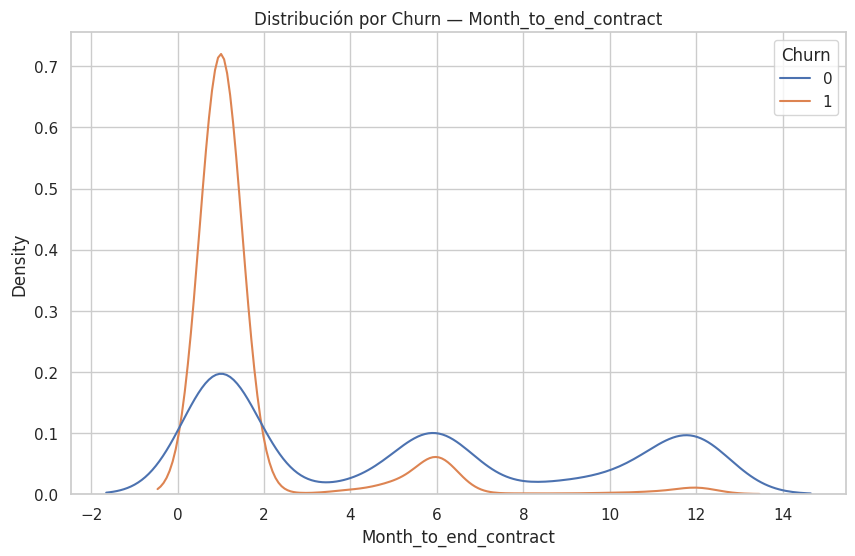

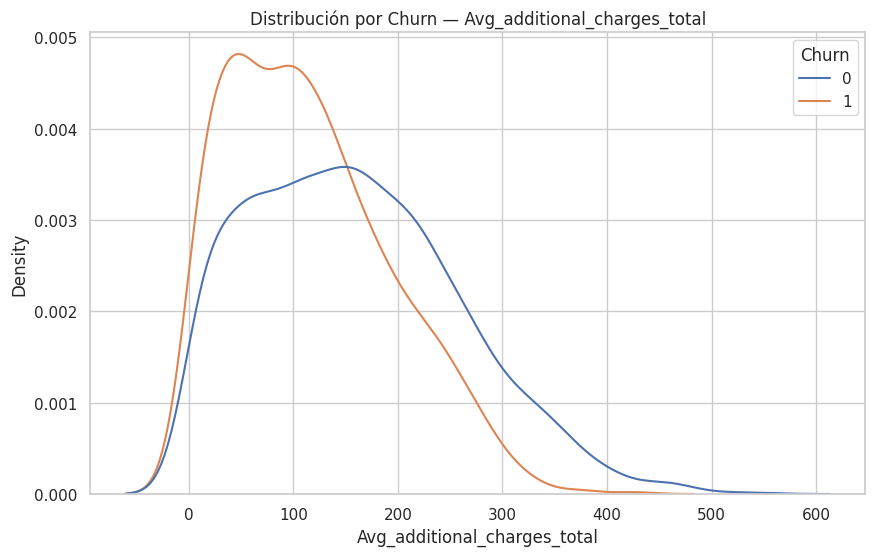

In [8]:
# Visualizaciones: comparativa Churn vs No-Churn
# Graficaremos algunas variables relevantes. Puedes añadir o quitar columnas según te interese.
cols_to_plot = [
'Age', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
'Month_to_end_contract', 'Avg_additional_charges_total'
]

for col in cols_to_plot:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue='Churn', common_norm=False)
    plt.title(f'Distribución por Churn — {col}')
    plt.show()

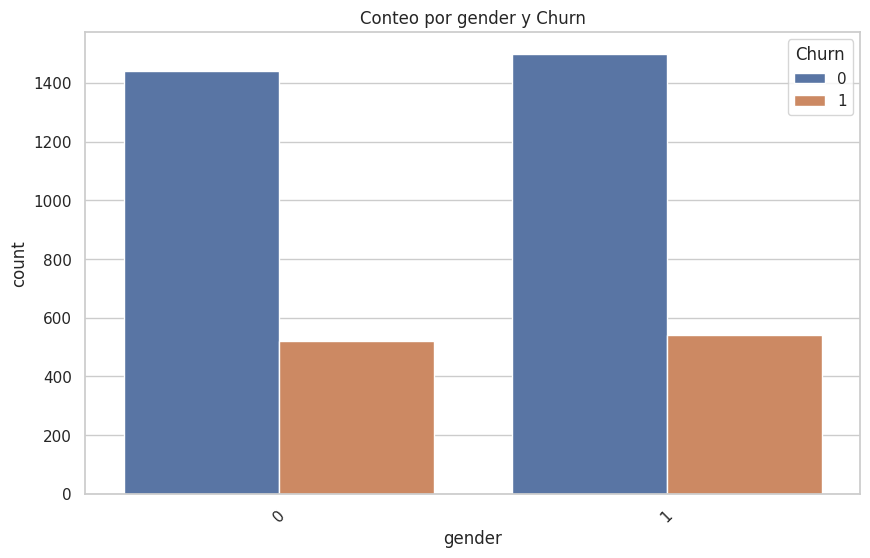

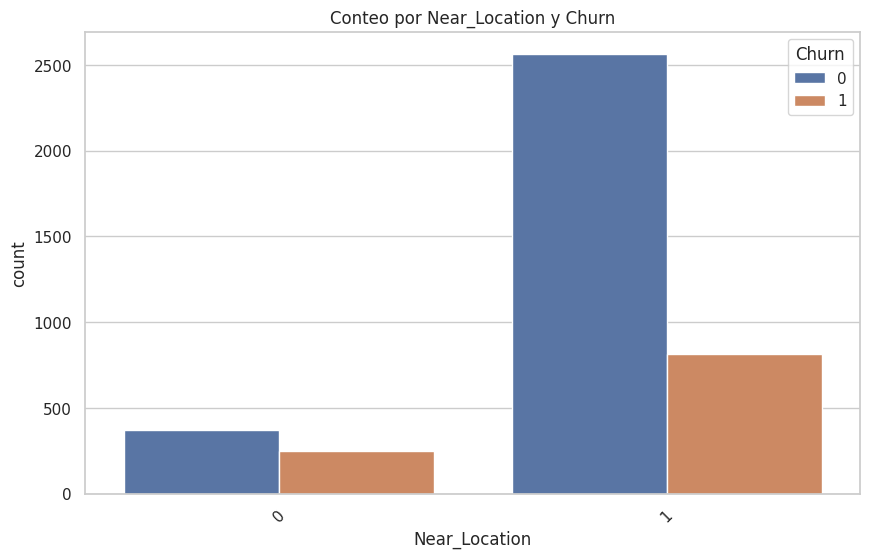

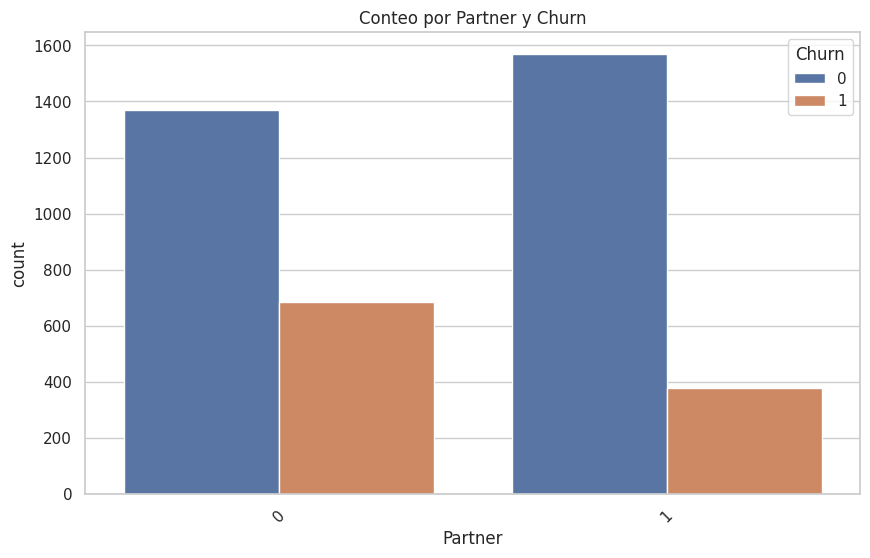

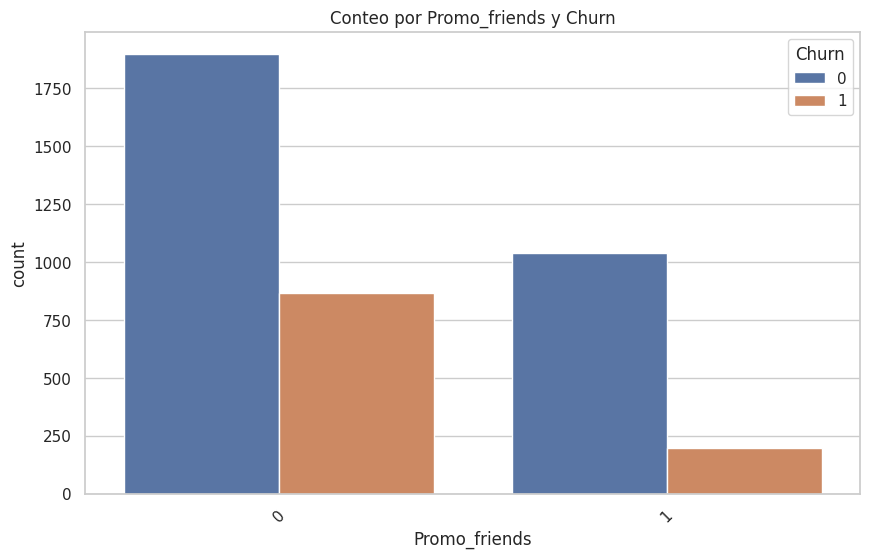

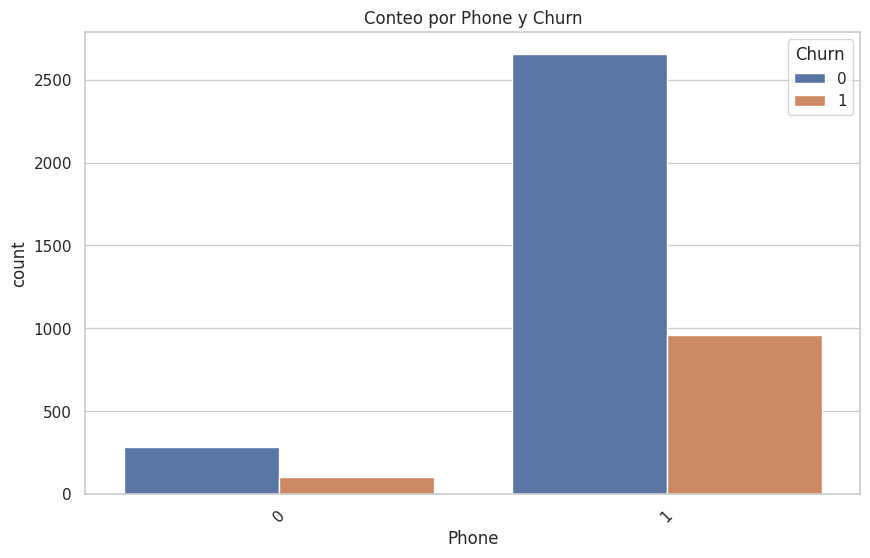

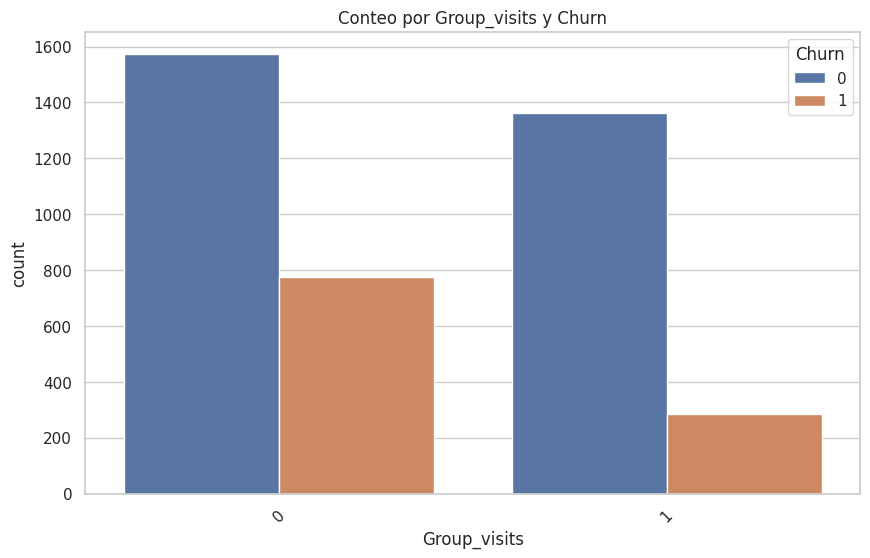

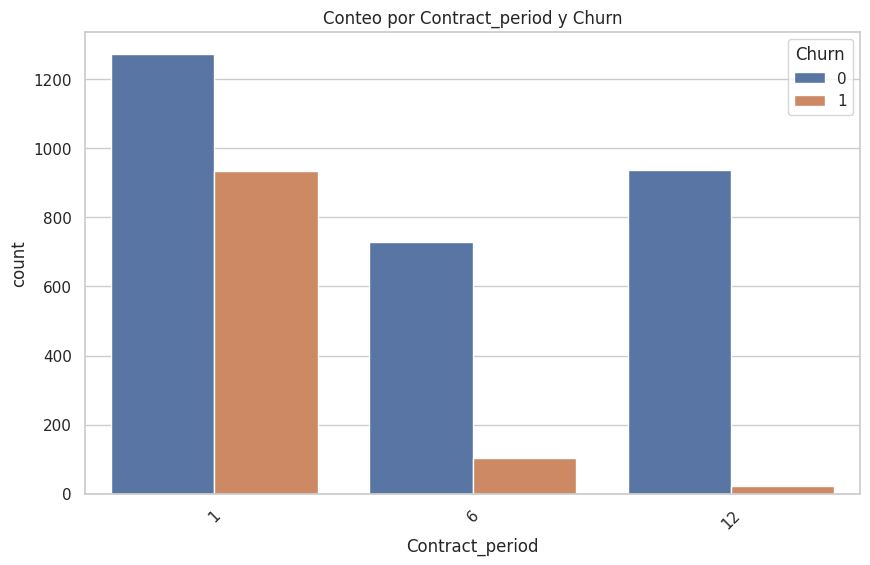

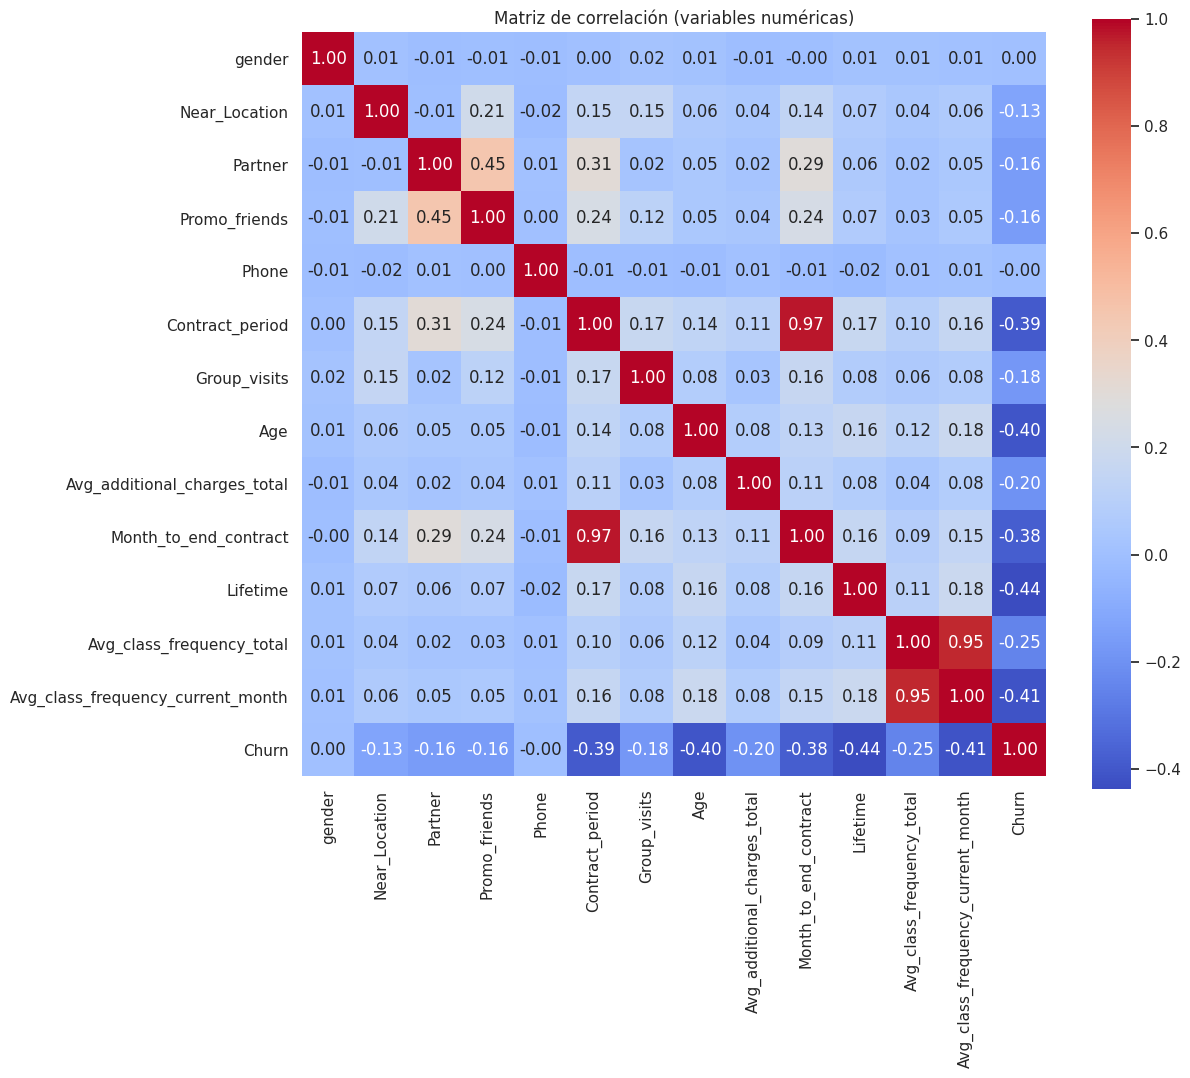

In [9]:
# Barras para variables categóricas simples
cat_cols = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Contract_period']


for col in cat_cols:
 if col in df.columns:
    plt.figure()
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Conteo por {col} y Churn')
    plt.xticks(rotation=45)
    plt.show()
# Matriz de correlación (numéricas)
plt.figure(figsize=(12,10))
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de correlación (variables numéricas)')
plt.show()

In [10]:
# 3) MODELADO: Preprocesado y entrenamiento

In [11]:
#Prepararemos los datos: codificaremos categóricas, escalaremos numéricas, y separaremos X/y.
data = df.copy()

# Convertir la variable objetivo a 0/1 si no lo está
if data['Churn'].dtype != 'int64' and data['Churn'].dtype != 'float64':
    le = LabelEncoder()
    data['Churn'] = le.fit_transform(data['Churn'])


# Columnas categóricas a encoder (labels)
cat_cols = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Contract_period']
for c in cat_cols:
    if c in data.columns:
        data[c] = data[c].astype(str)
        data[c] = LabelEncoder().fit_transform(data[c])

# Separar X y y
X = data.drop(columns=['Churn'])
y = data['Churn']

# Escalado de numéricas
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)
print('Tamaños: ', X_train.shape, X_val.shape)

Tamaños:  (3000, 13) (1000, 13)


Regresión logística — Informe:
              precision    recall  f1-score   support

           0     0.9372    0.9551    0.9461       735
           1     0.8685    0.8226    0.8450       265

    accuracy                         0.9200      1000
   macro avg     0.9029    0.8889    0.8955      1000
weighted avg     0.9190    0.9200    0.9193      1000

Accuracy: 0.92
Precision: 0.8685258964143426
Recall: 0.8226415094339623


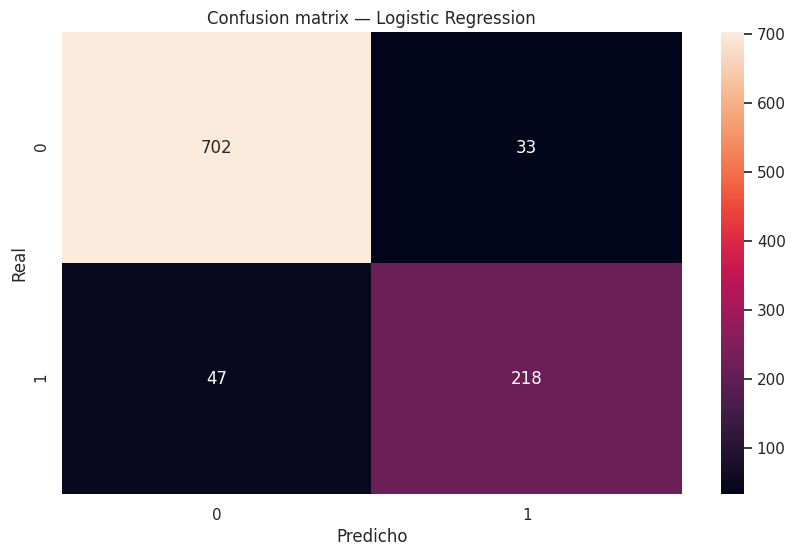

In [12]:
#3.a) Regresión logística
logreg = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_val)


print('Regresión logística — Informe:')
print(classification_report(y_val, y_pred_log, digits=4))


# Métricas adicionales
print('Accuracy:', accuracy_score(y_val, y_pred_log))
print('Precision:', precision_score(y_val, y_pred_log))
print('Recall:', recall_score(y_val, y_pred_log))


# Matriz de confusión
cm = confusion_matrix(y_val, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix — Logistic Regression')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

Random Forest — Informe:
              precision    recall  f1-score   support

           0     0.9314    0.9605    0.9457       735
           1     0.8802    0.8038    0.8402       265

    accuracy                         0.9190      1000
   macro avg     0.9058    0.8822    0.8930      1000
weighted avg     0.9178    0.9190    0.9178      1000

Accuracy: 0.919
Precision: 0.8801652892561983
Recall: 0.8037735849056604


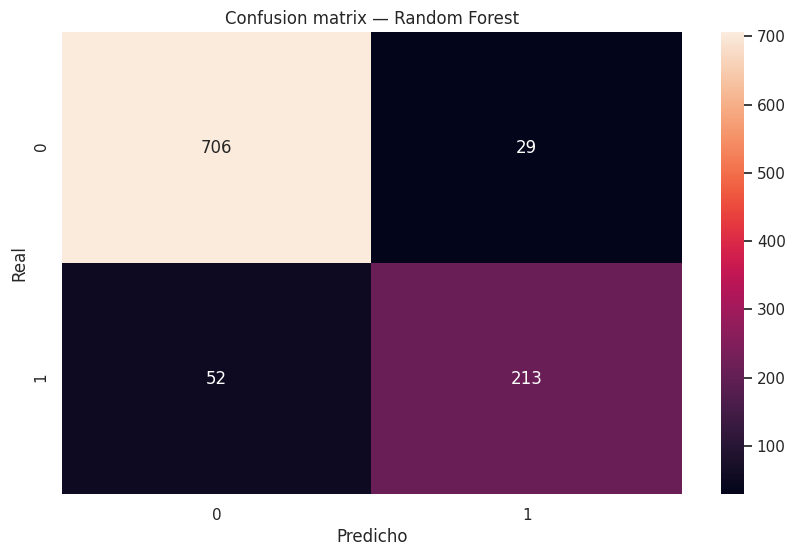

In [13]:
#3.b) Random Forest

rf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

print('Random Forest — Informe:')
print(classification_report(y_val, y_pred_rf, digits=4))

print('Accuracy:', accuracy_score(y_val, y_pred_rf))
print('Precision:', precision_score(y_val, y_pred_rf))
print('Recall:', recall_score(y_val, y_pred_rf))

cm = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix — Random Forest')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

,model,accuracy,precision,recall
0,LogisticRegression,0.920,0.868526,0.822642
1,RandomForest,0.919,0.880165,0.803774



Top 15 features por importancia (Random Forest)
Lifetime                             0.274239
Avg_class_frequency_current_month    0.169914
Avg_class_frequency_total            0.133382
Age                                  0.132826
Avg_additional_charges_total         0.085668
Month_to_end_contract                0.071593
Contract_period                      0.063494
Group_visits                         0.019420
gender                               0.011715
Partner                              0.011265
Promo_friends                        0.010405
Near_Location                        0.010111
Phone                                0.005969
dtype: float64


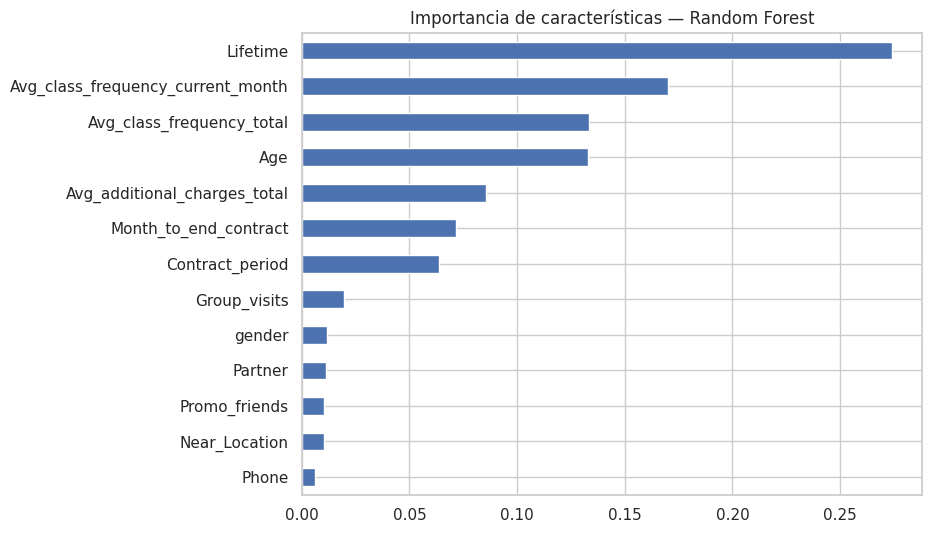

In [14]:
# Comparación rápida
models_summary = pd.DataFrame({
'model': ['LogisticRegression', 'RandomForest'],
'accuracy': [accuracy_score(y_val, y_pred_log), accuracy_score(y_val, y_pred_rf)],
'precision': [precision_score(y_val, y_pred_log), precision_score(y_val, y_pred_rf)],
'recall': [recall_score(y_val, y_pred_log), recall_score(y_val, y_pred_rf)]
})

display(models_summary)

# Importancia de variables (Random Forest)
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('\nTop 15 features por importancia (Random Forest)')
print(feat_importances.head(15))

plt.figure(figsize=(8,6))
feat_importances.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Importancia de características — Random Forest')
plt.show()

In [15]:
#4) CLUSTERING: jerárquico y KMeans

In [16]:
# Excluimos la columna `Churn` y usamos las otras características estandarizadas para clustering.

cluster_df = df.drop(columns=['Churn']).copy()
# Repetimos la codificación y escalado tal como antes para coherencia
for c in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Contract_period']:
    if c in cluster_df.columns:
     cluster_df[c] = cluster_df[c].astype(str)
     cluster_df[c] = LabelEncoder().fit_transform(cluster_df[c])

num_cols = cluster_df.select_dtypes(include=[np.number]).columns.tolist()
scaler_cl = StandardScaler()
cluster_df[num_cols] = scaler_cl.fit_transform(cluster_df[num_cols])

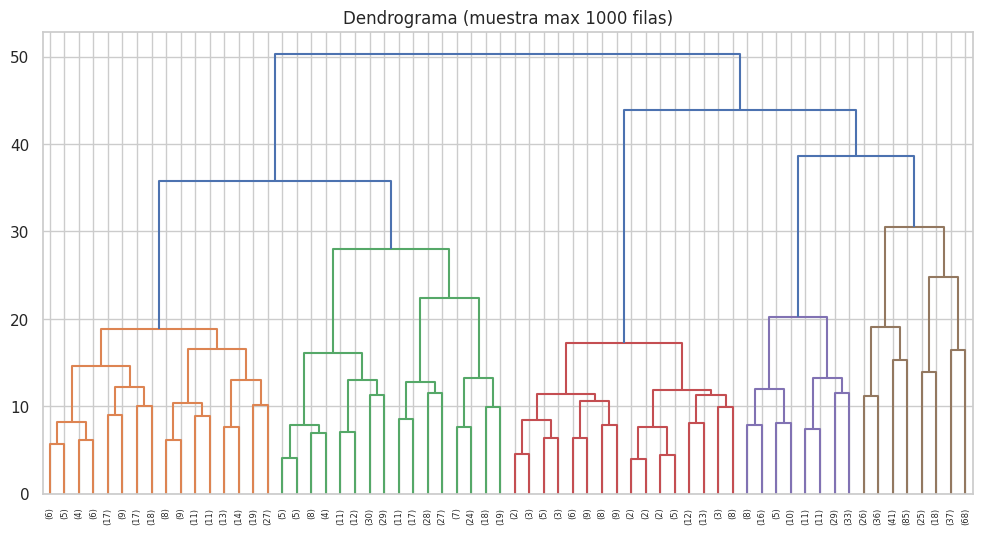

In [17]:
# 4.a) Dendrograma (linkage)
linked = linkage(cluster_df.sample(min(1000, len(cluster_df))), method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrograma (muestra max 1000 filas)')
plt.show()

cluster,0,1,2,3,4
gender,0.499076,0.511422,0.523316,0.482622,0.548660
Near_Location,0.000000,0.986735,0.862694,1.000000,0.990127
Partner,0.482440,0.693441,0.471503,0.327706,0.328632
Promo_friends,0.072089,0.501105,0.305699,0.214499,0.255289
Phone,1.000000,1.000000,0.000000,1.000000,1.000000
Contract_period,2.920518,9.417833,4.777202,1.548163,1.356841
Group_visits,0.229205,0.523950,0.427461,0.310824,0.473907
Age,28.602588,29.810612,29.297927,27.944389,30.128350
Avg_additional_charges_total,135.782489,160.242780,144.208179,127.379279,159.283275
Month_to_end_contract,2.739372,8.664702,4.466321,1.461768,1.205924


Tasa de churn por cluster (orden descendente):
cluster
3    0.587885
0    0.415896
2    0.266839
4    0.102962
1    0.050111
Name: Churn, dtype: float64


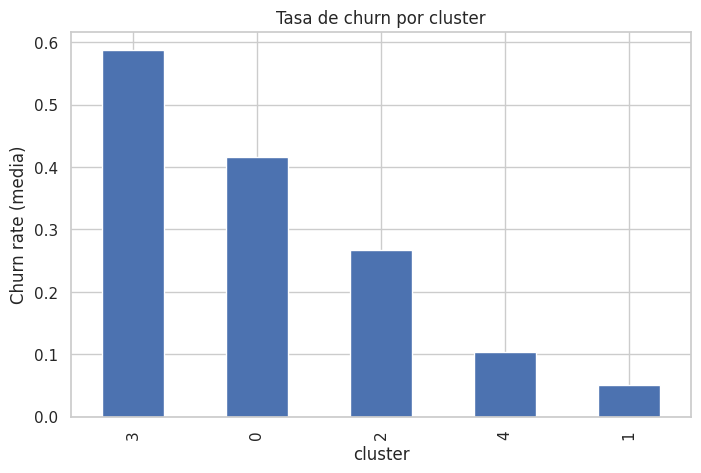

In [18]:
#4.b) KMeans con n=5
kmeans = KMeans(n_clusters=5, random_state=RANDOM_STATE)
cluster_labels = kmeans.fit_predict(cluster_df)

# Añadir etiquetas al df original (sin escalar)
df['cluster'] = cluster_labels

# Ver medias por cluster (usar df original con valores sin escalar ayuda a interpretación)
cluster_summary = df.groupby('cluster').mean()
display(cluster_summary.T)

# Churn rate por cluster
churn_by_cluster = df.groupby('cluster')['Churn'].mean().sort_values(ascending=False)
print('Tasa de churn por cluster (orden descendente):')
print(churn_by_cluster)

plt.figure(figsize=(8,5))
churn_by_cluster.plot(kind='bar')
plt.ylabel('Churn rate (media)')
plt.title('Tasa de churn por cluster')
plt.show()

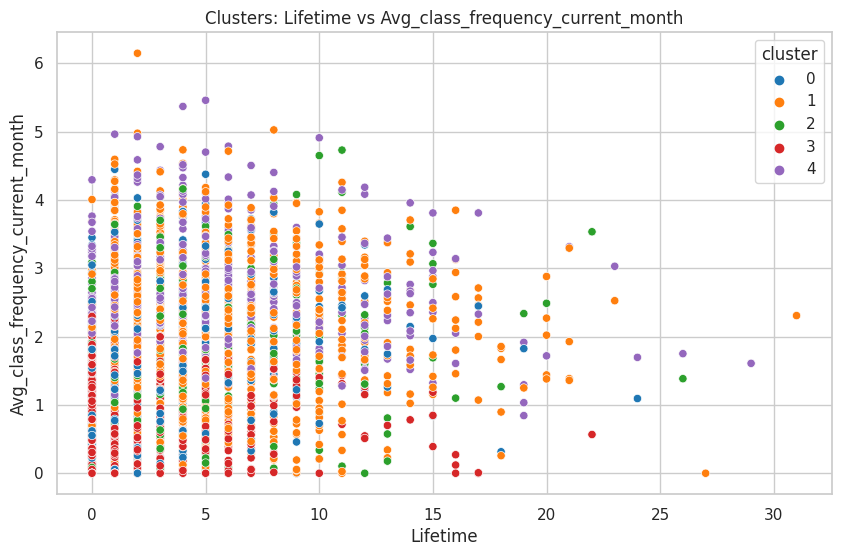

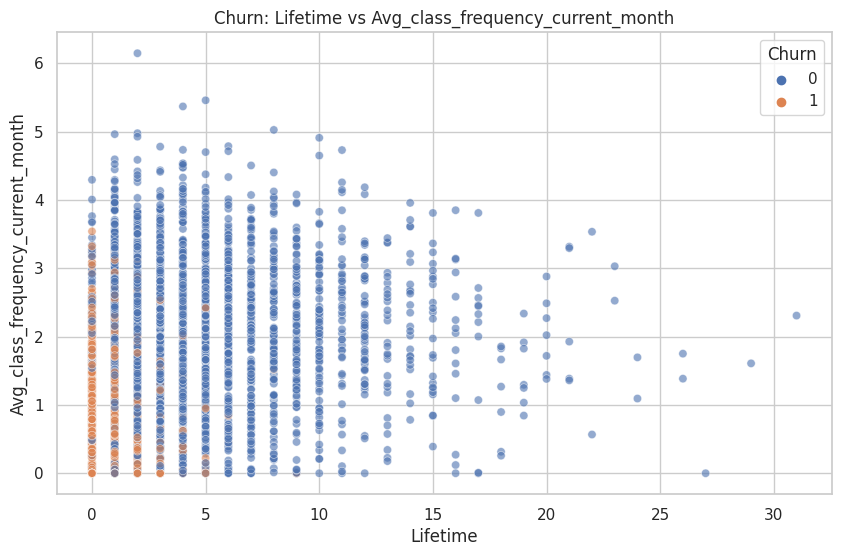

In [19]:
#Visualizaciones de clusters
#Tomaremos dos variables representativas y colorearemos por cluster y por churn

if 'Avg_class_frequency_current_month' in df.columns and 'Lifetime' in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x='Lifetime', y='Avg_class_frequency_current_month', hue='cluster', palette='tab10')
    plt.title('Clusters: Lifetime vs Avg_class_frequency_current_month')
    plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Lifetime', y='Avg_class_frequency_current_month', hue='Churn', alpha=0.6)
plt.title('Churn: Lifetime vs Avg_class_frequency_current_month')
plt.show()

In [20]:
#5) CONCLUSIONES Y RECOMENDACIONES 

#Conclusiones
#- Algunas variables con mayor impacto en el churn (según Random Forest)
#- Clusters con mayor churn: 0.587885 — suelen caracterizarse por menor frecuencia de visitas y contratos cortos.

#Recomendaciones prácticas
#1. Segmentación temprana: identificar rápidamente a clientes con baja `Avg_class_frequency_current_month` y `Lifetime` corto; lanzar campañas de re-engagement (SMS/llamadas) en la segunda semana.

#2. Promociones para renovación: clientes con `Month_to_end_contract` cercano y baja actividad deben recibir ofertas personalizadas (descuento en renovación o incentivo por traer a un amigo).

#3. Mejor seguimiento de usuarios sin `Phone` registrado: muchos gimnasios pierden la posibilidad de recontactar a estos usuarios.

#4. Programas de fidelidad para clusters leales: incentivos para quienes gastan en servicios adicionales `180 aprox con maxima densidad` y asisten con regularidad.